In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Read Data

In [137]:
df = pd.read_csv("course_labeled_1.csv")

In [138]:
df

,id,name,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users,course_classification
0,C_655852,系列课-已结课无回顾时长,162,1.0,0.666667,0.0,0.0,0.0,48,normal
1,C_655850,系列课-开课未开始,91,1.0,0.000000,0.0,0.0,0.0,47,bad
2,C_654554,系列课-开课中,99,1.0,0.655651,0.0,0.0,0.0,47,normal
3,C_654506,系列课-开课已结束有回顾时长,3,1.0,0.655651,0.0,0.0,0.0,47,bad
4,C_629558,医学免疫学与病原生物学,91,1.0,0.655651,0.0,0.0,0.0,48,normal
...,...,...,...,...,...,...,...,...,...,...
3776,C_2338005,（疾风计划）算法设计与分析,74,0.0,NaN,0.0,0.0,0.0,1,NaN
3777,C_2338076,（疾风计划）软件工程,103,0.0,NaN,0.0,0.0,0.0,1,NaN
3778,C_2341259,（疾风计划）面向对象程序设计（C++）,76,0.0,NaN,0.0,0.0,0.0,1,NaN
3779,C_2337996,（疾风计划）数据结构(下),324,0.0,NaN,0.0,0.0,0.0,1,NaN


In [139]:
df = df.dropna()
print(df.shape)

(2822, 10)


In [140]:
df.keys()

Index(['id', 'name', 'resource', 'total_comments', 'average_completion_rate',
       'negative', 'positive', 'neutral', 'num_users',
       'course_classification'],
      dtype='object')

In [141]:
X = df.drop(columns=['id',
                     'name',
                     'course_classification',])
y = df['course_classification']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [143]:
X

,resource,total_comments,average_completion_rate,negative,positive,neutral,num_users
0,162,1.0,0.666667,0.0,0.0,0.0,48
1,91,1.0,0.000000,0.0,0.0,0.0,47
2,99,1.0,0.655651,0.0,0.0,0.0,47
3,3,1.0,0.655651,0.0,0.0,0.0,47
4,91,1.0,0.655651,0.0,0.0,0.0,48
...,...,...,...,...,...,...,...
2817,78,1.0,0.835524,0.0,0.0,0.0,355
2818,204,1.0,0.736111,0.0,0.0,0.0,103
2819,26,1.0,0.635000,0.0,0.0,0.0,90
2820,42,1.0,0.655651,0.0,0.0,0.0,75


# Random Forest

In [166]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [167]:
y_pred = rf.predict(X_test)

accuracy: 0.953257790368272
F1 score: 0.953376977948832


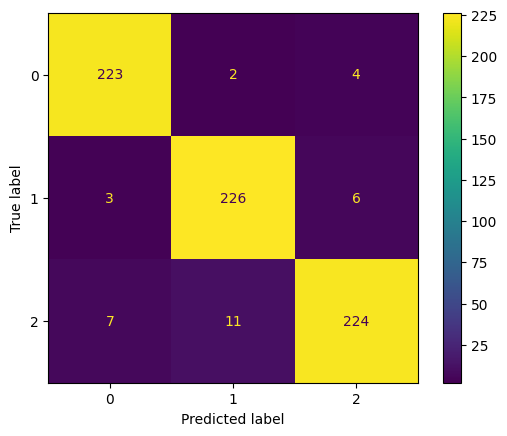

In [168]:
rf_acc = accuracy_score(y_test,y_pred)
rf_f1 = f1_score(y_test,y_pred, average='macro')
print(f'accuracy: {rf_acc}')
print(f'F1 score: {rf_f1}')
rf_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp.plot()
plt.show()

In [178]:
cross_val_score(rf,X,y,cv=10)

array([0.98233216, 0.9434629 , 0.96453901, 0.94326241, 0.92553191,
       0.92553191, 0.94680851, 0.92198582, 0.96808511, 0.95744681])

In [149]:
# import joblib

# # save
# joblib.dump(model, "course_clf.pkl") 

# K nearest neighbors

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [173]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [174]:
y_pred = knn.predict(X_test)

accuracy: 0.5439093484419264
F1 score: 0.5365605733106965


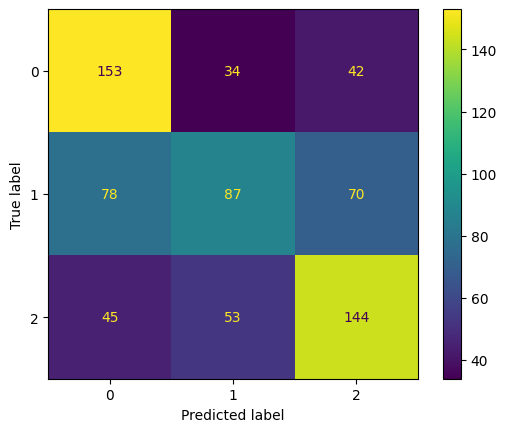

In [175]:
knn_acc = accuracy_score(y_test,y_pred)
knn_f1 = f1_score(y_test,y_pred,average="macro")
print(f'accuracy: {knn_acc}')
print(f'F1 score: {knn_f1}')
knn_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
disp.plot()
plt.show()

In [176]:
cross_val_score(knn,X,y,cv=10)

array([0.56183746, 0.6254417 , 0.62765957, 0.56028369, 0.53546099,
       0.55673759, 0.44680851, 0.53900709, 0.56028369, 0.42553191])

# Support Vector Machine

In [179]:
from sklearn.svm import SVC
svc = SVC()

In [180]:
svc.fit(X_train,y_train)

SVC()

In [181]:
y_pred = svc.predict(X_test)

accuracy: 0.5084985835694051
F1 score: 0.4537482631981889


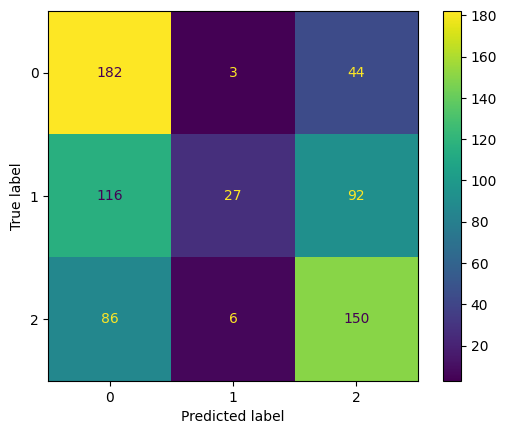

In [182]:
svc_acc = accuracy_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred, average = "macro")
print(f'accuracy: {svc_acc}')
print(f'F1 score: {svc_f1}')
svc_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm)
disp.plot()
plt.show()

In [183]:
cross_val_score(svc,X,y,cv=10)

array([0.54063604, 0.52650177, 0.54964539, 0.54964539, 0.54964539,
       0.53900709, 0.54964539, 0.45390071, 0.4964539 , 0.42553191])

# Decision Tree Classifier

In [184]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [185]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [186]:
y_pred = tree.predict(X_test)

accuracy: 0.9362606232294618
F1 score: 0.9365625281652763


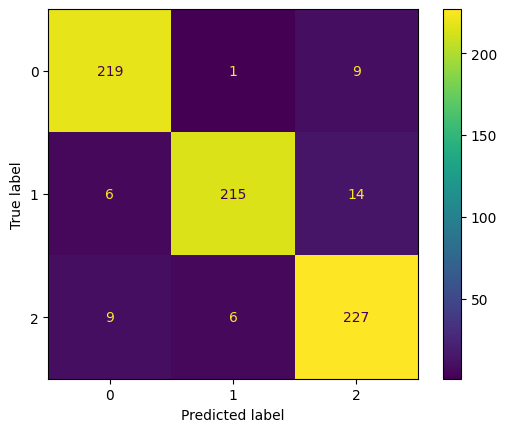

In [187]:
tree_acc = accuracy_score(y_test, y_pred)
tree_f1 = f1_score(y_test, y_pred, average = "macro")
print(f'accuracy: {tree_acc}')
print(f'F1 score: {tree_f1}')
tree_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm)
disp.plot()
plt.show()

In [164]:
cross_val_score(tree,X,y,cv=10)

array([0.96113074, 0.92932862, 0.95390071, 0.92907801, 0.94326241,
       0.92553191, 0.91843972, 0.94680851, 0.95390071, 0.91489362])

# Evaluation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


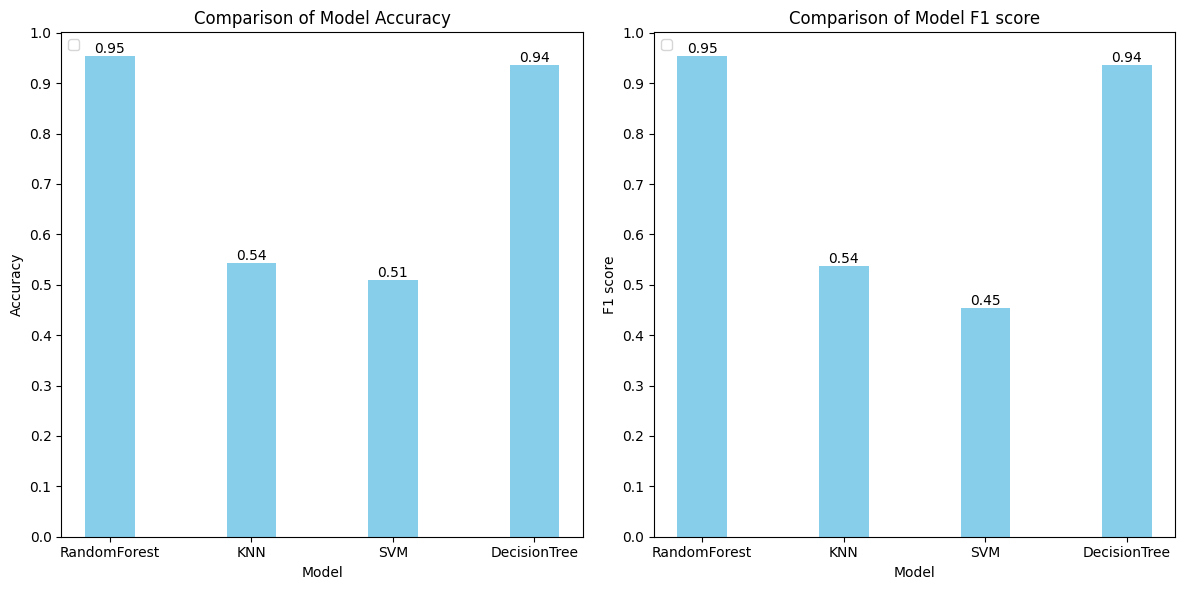

In [198]:
import numpy as np
models = ['RandomForest', 'KNN', 'SVM', 'DecisionTree']
acc = [rf_acc, knn_acc, svc_acc, tree_acc]
f1 = [rf_f1, knn_f1, svc_f1, tree_f1]

bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

# Subplot cho Age Accuracy
plt.subplot(1, 2, 1)  # 1 dòng, 2 cột, subplot 1
colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue']  # Chỉ định màu của các cột
plt.bar(index, acc, bar_width, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(index, models)
plt.yticks(np.arange(0, 1.1, 0.1))
for i in range(len(models)):
    plt.text(i, acc[i] , f'{acc[i]:.2f}', ha='center', va='bottom', color='black')
plt.legend(loc='upper left')

# Subplot cho Gender Accuracy
plt.subplot(1, 2, 2)  # 1 dòng, 2 cột, subplot 2
colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue']  # Chỉ định màu của các cột
plt.bar(index, f1, bar_width, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 score')
plt.title('Comparison of Model F1 score')
plt.xticks(index, models)
plt.yticks(np.arange(0, 1.1, 0.1))
for i in range(len(models)):
    plt.text(i, f1[i], f'{f1[i]:.2f}', ha='center', va='bottom', color='black')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()